In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Importing Dataset

In [7]:
data = pd.read_csv(r"C:\Users\Loges\Downloads\Datasets\Fuel_Consumption_Ratings.csv")
data

,Model Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,2023,Volvo,XC40 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.2,7.9,9.2,31,215,5,5
829,2023,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.3,8.2,9.4,30,218,5,5
830,2023,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.1,8.7,10.0,28,233,5,7
831,2023,Volvo,XC90 B5 AWD,SUV: Standard,2.0,4,AS8,Z,10.5,8.4,9.6,29,223,5,5


## Dataset Info

In [8]:
data.describe()

,Model Year,Engine Size (L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
count,833.0,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,2023.0,3.147899,5.627851,12.431453,9.353661,11.047179,27.375750,257.471789,4.522209,5.236495
std,0.0,1.353076,1.968695,3.456191,2.302312,2.878308,7.559968,64.262847,1.279385,1.665693
min,2023.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2023.0,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,211.000000,4.000000,5.000000
50%,2023.0,3.000000,6.000000,12.100000,9.100000,10.700000,26.000000,254.000000,5.000000,5.000000
75%,2023.0,3.600000,6.000000,14.600000,10.700000,12.900000,31.000000,299.000000,5.000000,7.000000
max,2023.0,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,9.000000,8.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Model Year                        833 non-null    int64  
 1   Make                              833 non-null    object 
 2   Model                             833 non-null    object 
 3   Vehicle Class                     833 non-null    object 
 4   Engine Size (L)                   833 non-null    float64
 5   Cylinders                         833 non-null    int64  
 6   Transmission                      833 non-null    object 
 7   Fuel Type                         833 non-null    object 
 8   Fuel Consumption City (L/100 km)  833 non-null    float64
 9   Fuel Consumption Hwy (L/100 km)   833 non-null    float64
 10  Fuel Consumption Comb (L/100 km)  833 non-null    float64
 11  Fuel Consumption Comb (mpg)       833 non-null    int64  
 12  CO2 Emis

<Axes: >

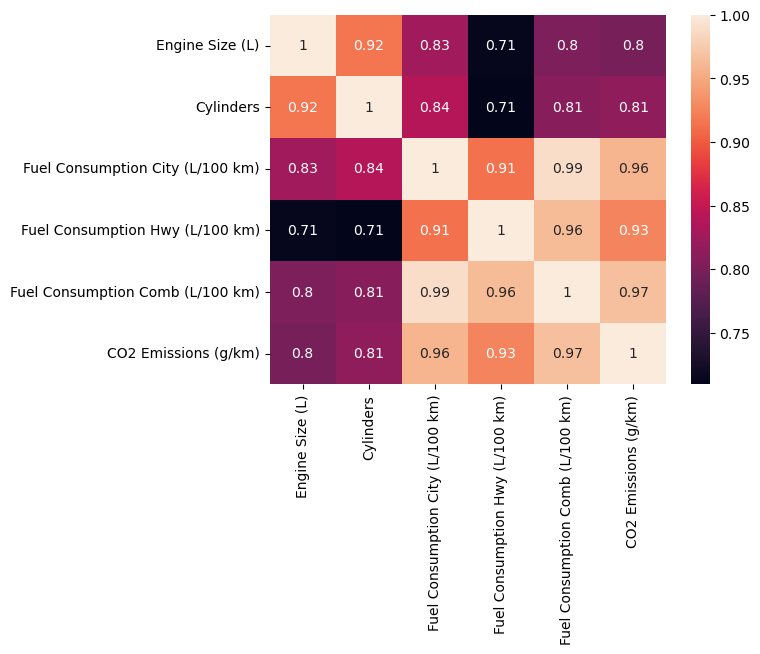

In [31]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [10]:
df = data[['Engine Size (L)',
           "Cylinders",
           "Fuel Consumption City (L/100 km)",
           "Fuel Consumption Hwy (L/100 km)", 
           "Fuel Consumption Comb (L/100 km)",
           "CO2 Emissions (g/km)"]]
df

,Engine Size (L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions (g/km)
0,1.5,4,7.9,6.3,7.2,167
1,1.5,4,8.1,6.5,7.4,172
2,1.5,4,8.9,6.5,7.8,181
3,3.5,6,12.6,9.4,11.2,263
4,3.0,6,13.8,11.2,12.4,291
...,...,...,...,...,...,...
828,2.0,4,10.2,7.9,9.2,215
829,2.0,4,10.3,8.2,9.4,218
830,2.0,4,11.1,8.7,10.0,233
831,2.0,4,10.5,8.4,9.6,223


## Data Visualization

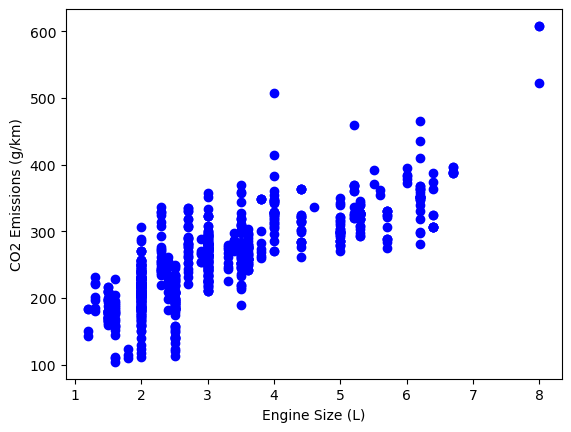

In [13]:
plt.scatter(df["Engine Size (L)"], df["CO2 Emissions (g/km)"],  color='blue')
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

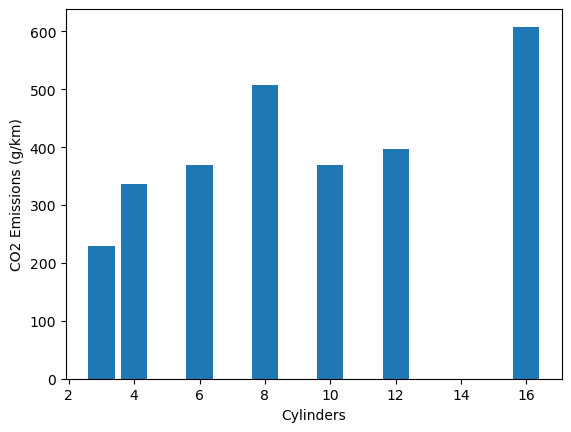

In [22]:
plt.bar(df['Cylinders'], df['CO2 Emissions (g/km)'])
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

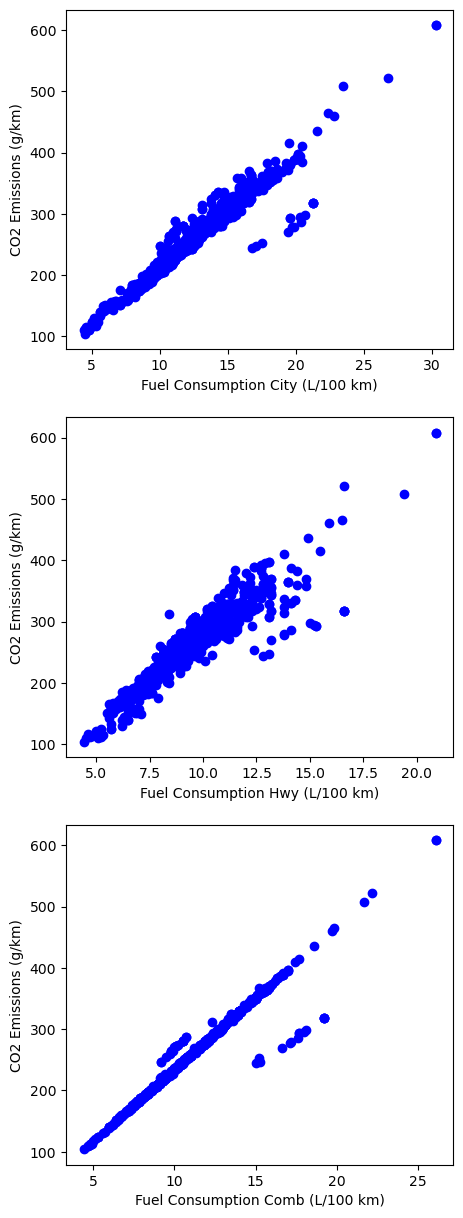

In [29]:
plt.figure(figsize=(5, 15))

plt.subplot(3,1,1)
plt.scatter(df["Fuel Consumption City (L/100 km)"], df["CO2 Emissions (g/km)"],  color='blue')
plt.xlabel("Fuel Consumption City (L/100 km)")
plt.ylabel("CO2 Emissions (g/km)")

plt.subplot(3,1,2)
plt.scatter(df["Fuel Consumption Hwy (L/100 km)"], df["CO2 Emissions (g/km)"],  color='blue')
plt.xlabel("Fuel Consumption Hwy (L/100 km)")
plt.ylabel("CO2 Emissions (g/km)")

plt.subplot(3,1,3)
plt.scatter(df["Fuel Consumption Comb (L/100 km)"], df["CO2 Emissions (g/km)"],  color='blue')
plt.xlabel("Fuel Consumption Comb (L/100 km)")
plt.ylabel("CO2 Emissions (g/km)")

plt.show()

## Train Test Split

In [14]:
target = df["CO2 Emissions (g/km)"]
target

0      167
1      172
2      181
3      263
4      291
      ... 
828    215
829    218
830    233
831    223
832    249
Name: CO2 Emissions (g/km), Length: 833, dtype: int64

In [16]:
train_data = df.drop(["CO2 Emissions (g/km)"], axis=1)
train_data

,Engine Size (L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km)
0,1.5,4,7.9,6.3,7.2
1,1.5,4,8.1,6.5,7.4
2,1.5,4,8.9,6.5,7.8
3,3.5,6,12.6,9.4,11.2
4,3.0,6,13.8,11.2,12.4
...,...,...,...,...,...
828,2.0,4,10.2,7.9,9.2
829,2.0,4,10.3,8.2,9.4
830,2.0,4,11.1,8.7,10.0
831,2.0,4,10.5,8.4,9.6


In [18]:
x_tr, x_te, y_tr, y_te = train_test_split(train_data, target, random_state = 123)

In [19]:
x_tr

,Engine Size (L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km)
367,5.3,8,15.2,12.2,13.9
161,2.0,4,11.2,9.0,10.2
483,1.6,4,8.9,6.9,8.0
209,3.0,6,11.0,8.5,9.9
167,2.0,4,12.6,8.3,10.7
...,...,...,...,...,...
98,4.4,8,16.1,11.1,13.8
322,2.3,4,11.0,7.4,9.3
382,3.0,6,11.2,8.7,10.1
365,3.0,6,11.1,10.2,10.7


In [85]:
#Error tracing
mse, r2, var = [], [], []

## Simple Linear Regression

In [86]:
# Engine size vs CO2 Emissions
simple_model_EngineSize = LinearRegression()
x_train_Eng = np.array(x_tr["Engine Size (L)"]).reshape(-1, 1)
simple_model_EngineSize.fit(x_train_Eng, y_tr)

x_test = np.array(x_te["Engine Size (L)"]).reshape(-1, 1)
var.append(simple_model_EngineSize.score(x_test, y_te))
print("Variance Score:", var[0])

y_pred = simple_model_EngineSize.predict(x_test)
mse.append(mean_squared_error(y_pred, y_te))
r2.append(r2_score(y_pred, y_te))
print("Mean Squared Error:", mse[0])
print("R2-Score:", r2[0])

Variance Score: 0.5387077213801972
Mean Squared Error: 1749.6063271508688
R2-Score: 0.3364310254412737


In [87]:
#Fuel Consumption Comb vs CO2 Emissions
simple_model_FCC = LinearRegression()
x_train_FCC = np.array(x_tr["Fuel Consumption Comb (L/100 km)"]).reshape(-1, 1)
simple_model_FCC.fit(x_train_FCC, y_tr)

x_test = np.array(x_te["Fuel Consumption Comb (L/100 km)"]).reshape(-1, 1)
var.append(simple_model_FCC.score(x_test, y_te))
print("Variance Score:", var[1])

y_pred = simple_model_FCC.predict(x_test)
mse.append(mean_squared_error(y_pred, y_te))
r2.append(r2_score(y_pred, y_te))
print("Mean Squared Error:", mse[1])
print("R2-Score:", r2[1])

Variance Score: 0.9277169808280084
Mean Squared Error: 274.15769469906564
R2-Score: 0.9256499233337254


In [88]:
#Fuel Consumption Hwy vs CO2 Emissions
simple_model_FCH = LinearRegression()
x_train_FCH = np.array(x_tr["Fuel Consumption Hwy (L/100 km)"]).reshape(-1, 1)
simple_model_FCH.fit(x_train_FCH, y_tr)

x_test = np.array(x_te["Fuel Consumption Hwy (L/100 km)"]).reshape(-1, 1)
var.append(simple_model_FCH.score(x_test, y_te))
print("Variance Score:", var[2])

y_pred = simple_model_FCH.predict(x_test)
mse.append(mean_squared_error(y_pred, y_te))
r2.append(r2_score(y_pred, y_te))
print("Mean Squared Error:", mse[2])
print("R2-Score:", r2[2])

Variance Score: 0.8360303379746987
Mean Squared Error: 621.9101672341349
R2-Score: 0.8278189143454281


In [89]:
#Fuel Consumption City vs CO2 Emissions
simple_model_FCCt = LinearRegression()
x_train_FCCt = np.array(x_tr["Fuel Consumption City (L/100 km)"]).reshape(-1, 1)
simple_model_FCCt.fit(x_train_FCCt, y_tr)

x_test = np.array(x_te["Fuel Consumption City (L/100 km)"]).reshape(-1, 1)
var.append(simple_model_FCCt.score(x_test, y_te))
print("Variance Score:", var[3])

y_pred = simple_model_FCCt.predict(x_test)
mse.append(mean_squared_error(y_pred, y_te))
r2.append(r2_score(y_pred, y_te))
print("Mean Squared Error:", mse[3])
print("R2-Score:", r2[3])

Variance Score: 0.9067013101093974
Mean Squared Error: 353.86670385182015
R2-Score: 0.9009920294782872


In [90]:
#Cylinders vs CO2 Emissions
simple_model_Cylinders = LinearRegression()
x_train_Cy = np.array(x_tr["Cylinders"]).reshape(-1, 1)
simple_model_Cylinders.fit(x_train_Cy, y_tr)

x_test = np.array(x_te["Cylinders"]).reshape(-1, 1)
var.append(simple_model_Cylinders.score(x_test, y_te))
print("Variance Score:",var[4])

y_pred = simple_model_Cylinders.predict(x_test)
mse.append(mean_squared_error(y_pred, y_te))
r2.append(r2_score(y_pred, y_te))
print("Mean Squared Error:", mse[4])
print("R2-Score:", r2[4])

Variance Score: 0.6066876276974559
Mean Squared Error: 1491.7696372160954
R2-Score: 0.35228154167235226


### Model Approximation

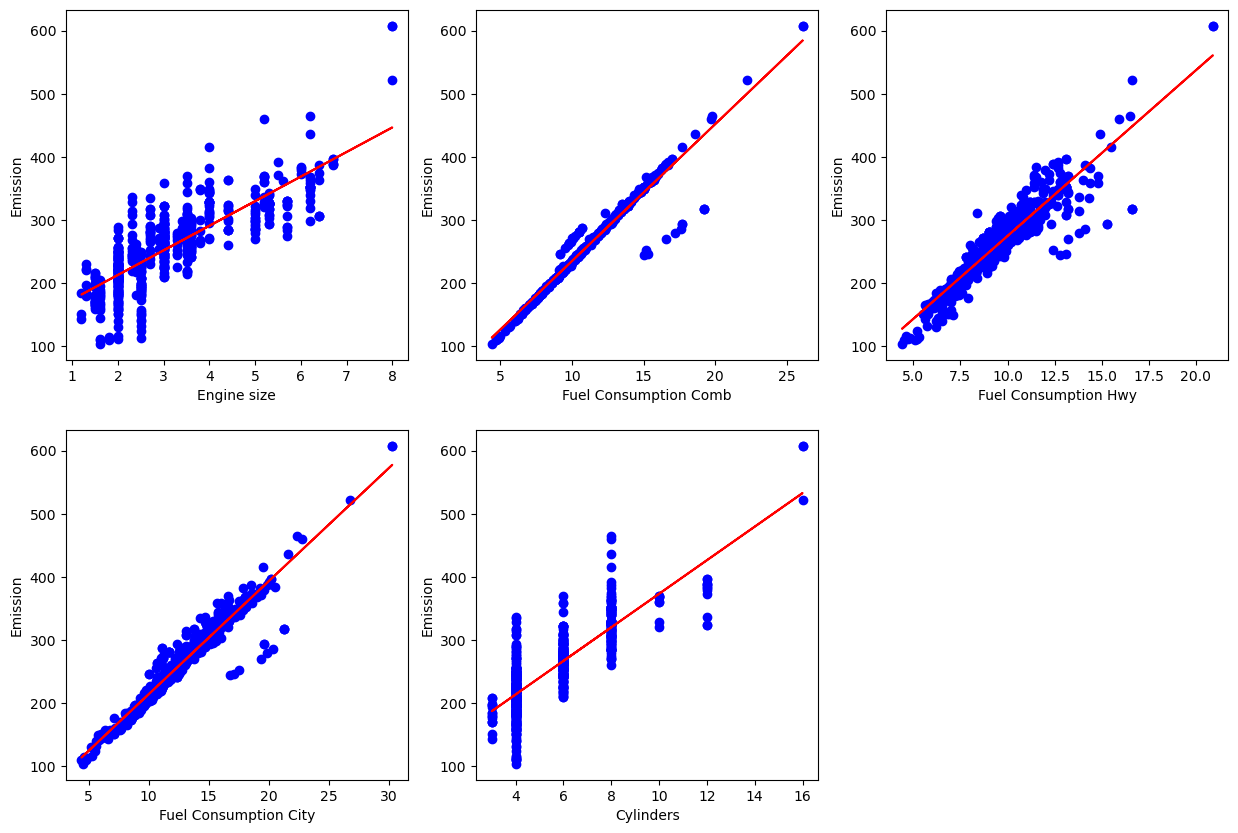

In [65]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.scatter(x_train_Eng, y_tr,  color='blue')
plt.plot(x_train_Eng, simple_model_EngineSize.coef_[0]*x_train_Eng + simple_model_EngineSize.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

plt.subplot(2,3,2)
plt.scatter(x_train_FCC, y_tr,  color='blue')
plt.plot(x_train_FCC, simple_model_FCC.coef_[0]*x_train_FCC + simple_model_FCC.intercept_, '-r')
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("Emission")

plt.subplot(2,3,3)
plt.scatter(x_train_FCH, y_tr,  color='blue')
plt.plot(x_train_FCH, simple_model_FCH.coef_[0]*x_train_FCH + simple_model_FCH.intercept_, '-r')
plt.xlabel("Fuel Consumption Hwy")
plt.ylabel("Emission")

plt.subplot(2,3,4)
plt.scatter(x_train_FCCt, y_tr,  color='blue')
plt.plot(x_train_FCCt, simple_model_FCCt.coef_[0]*x_train_FCCt + simple_model_FCCt.intercept_, '-r')
plt.xlabel("Fuel Consumption City")
plt.ylabel("Emission")

plt.subplot(2,3,5)
plt.scatter(x_train_Cy, y_tr,  color='blue')
plt.plot(x_train_Cy, simple_model_Cylinders.coef_[0]*x_train_Cy + simple_model_Cylinders.intercept_, '-r')
plt.xlabel("Cylinders")
plt.ylabel("Emission")

plt.show()

## Multiple Linear Regression

In [106]:
multi_linear = LinearRegression()
multi_linear.fit(x_tr, y_tr)

var.append(multi_linear.score(x_te, y_te))
print("Variance Score:", var[5])

y_pred = multi_linear.predict(x_te)
mse.append(mean_squared_error(y_pred, y_te))
r2.append(r2_score(y_pred, y_te))
print("Mean Squared Error:", mse[5])
print("R2-Score:", r2[5])

Variance Score: 0.9292843040504164
Mean Squared Error: 268.21309351297936
R2-Score: 0.9259082682624831


## Score Comparisons

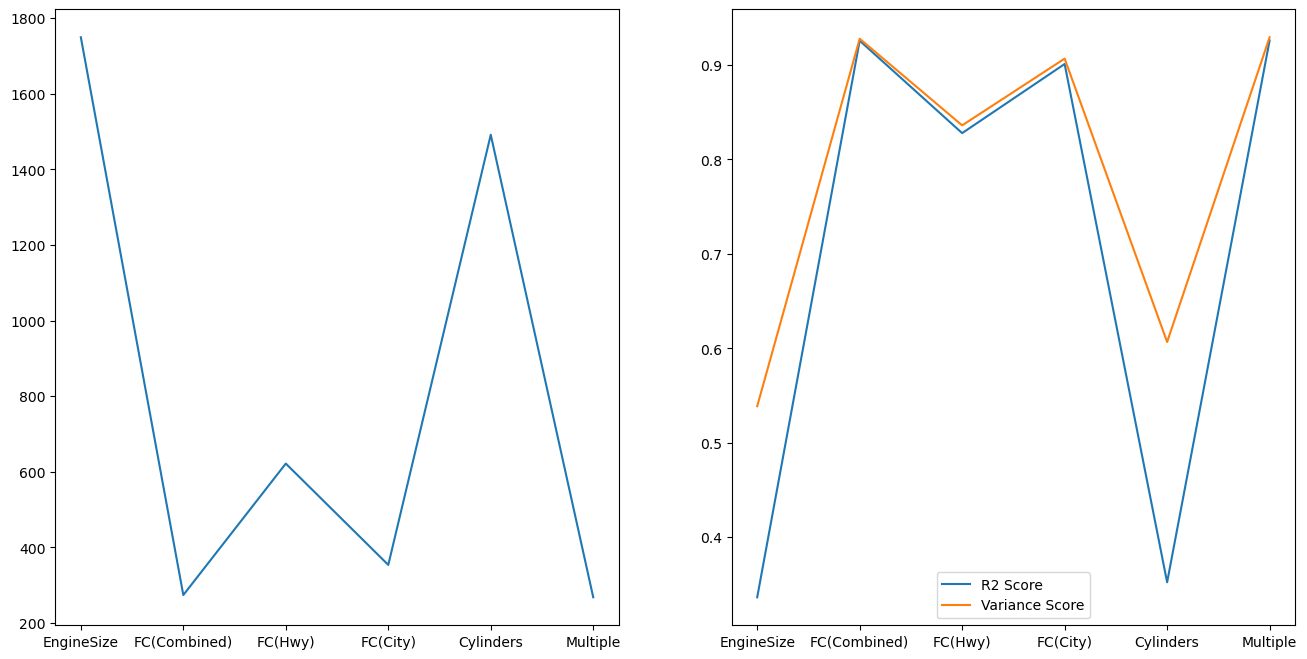

In [111]:
Models = ['EngineSize','FC(Combined)', 'FC(Hwy)', "FC(City)", "Cylinders", "Multiple"]
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(mse, label='MSE')
plt.xticks(ticks=[0,1,2,3,4,5],labels=Models)

plt.subplot(1,2,2)
plt.plot(r2, label='R2 Score')
plt.plot(var, label='Variance Score')
plt.xticks(ticks=[0,1,2,3,4,5],labels=Models)
plt.legend()
plt.show()